In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [6]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handleRate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Types of Restaurant')

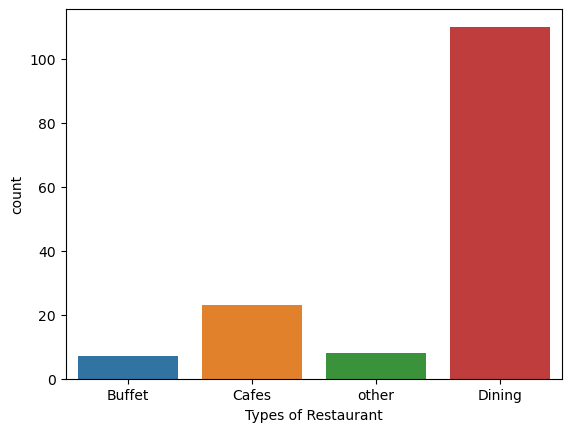

In [9]:
sns.countplot(x= df['listed_in(type)'])
plt.xlabel("Types of Restaurant")

Conclusion:The Majority of the restaurants fall into dining category

# Dining Restaurant are preferred by a     larger no of individuals 

Text(0, 0.5, 'Votes')

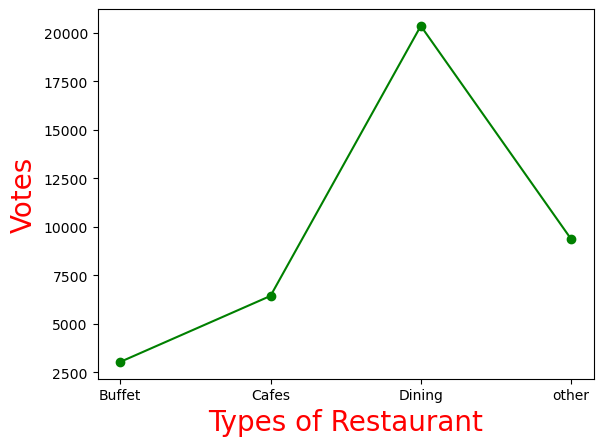

In [11]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="green", marker="o")
plt.xlabel("Types of Restaurant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

# The majority of restaurants received ratings

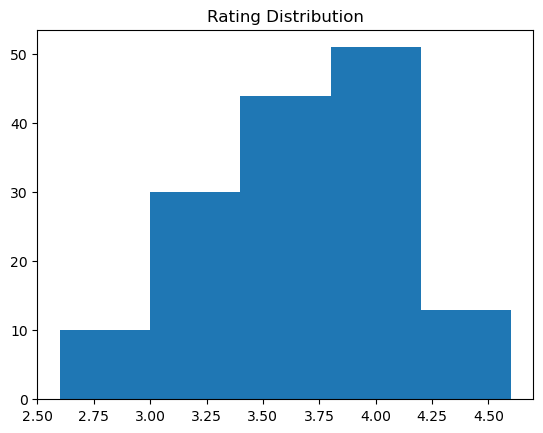

In [12]:
plt.hist(df['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

Conclusion:The majority of restaurants received ratings ranging from 3.5 to 4

# The majority of couples prefer restaurant with an approximate cost of 300 rupees

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

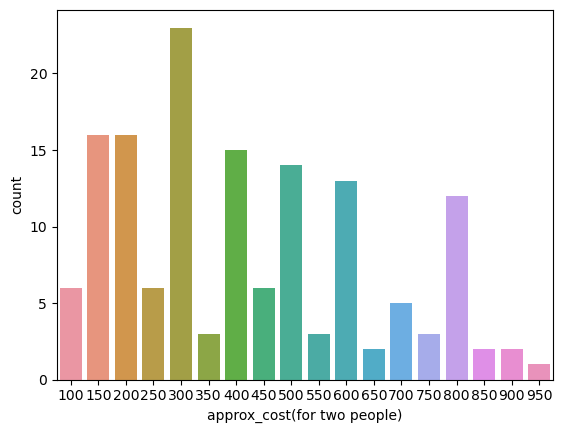

In [13]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Whether Online orders receive higher ratings than offline orders

<Axes: xlabel='online_order', ylabel='rate'>

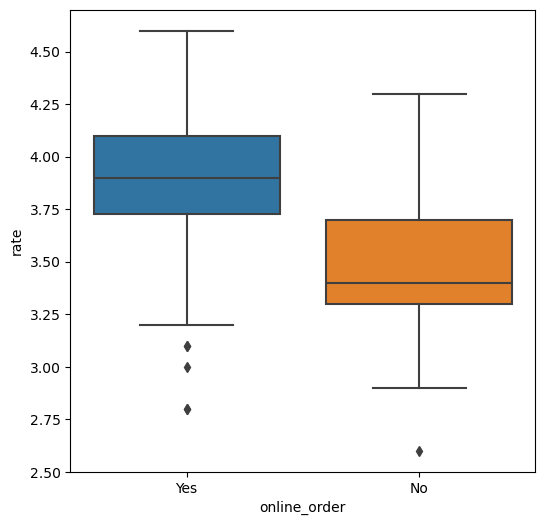

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=df)

Conclusion: Offline orders received lower ratings in camparision to online orders,which obtain excellent ratings

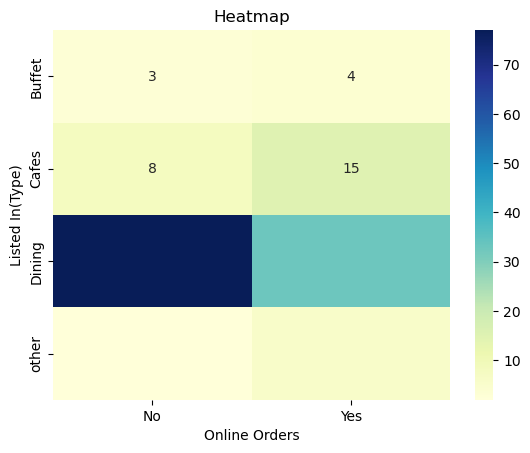

In [22]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc="size",fill_value=0)
sns.heatmap(pivot_table, annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Orders")
plt.ylabel("Listed In(Type)")
plt.show()

In [ ]:
CONCLUSION: Dining restaurant primarily accept offline orders,whereas cafes primarily receive online orders.This suggests that clients prefer to place orders in person at restaurants,but prefer online ordering at cafes